# Datos del paper de Fair sobre relaciones extramaritales

Fair, Ray. 1978. "A Theory of Extramarital Affairs," Journal of Political Economy, Febrero, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

Estos datos provienen de la revista Redbook, quien realizó una encuesta de mujeres en 1974 en la que se preguntó sobre relaciones extramatrimoniales. Este ejercicio no neecesariamente corresponde con el trabajo mostrado en el Paper de Fair, la idea de la tarea es que lleven a cabo un procedimiento alterno de los datos

## 1. Importación de bibliotecas y datos

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Información de los datos:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [3]:
# Deescripción de los datos
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [15]:
# Importamos los datos a un data frame:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## 2. Transformación de los datos

In [41]:
# Agregamos una variable dicótomica para identificar personas con relaciones extramaritales
df['affair'] = (df['affairs'] > 0).astype(float)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,const
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0,1


In [35]:
# Estadísticas descriptivas de los datos:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,const
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.0
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495,1.0
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468,0.0
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000,1.0
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000,1.0
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000,1.0
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000,1.0


## 3. Estimamos el modelo

En esta sección deberá estimar el modelo Logit bivariado, para ello utilice como variable dependiente si el individuo tiene una relación extramarital, lo cual se considera en la variable: "affair", en la que se indica con un 1 si tiene y con 0 si no tiene.

Utilice como variables explicativas cualquiera de las demás variables (con excepción de "affairs", por ser en escencia la misma que la variable dependiente). 

La sintaxis de la instrucción del modelo Logit es:

modelo = logit("Var_dependiente ~ Var_independeinte_1 + Var_independeinte_2 + ...
                + Var_independeinte_K", Nombre_DataFrame)

In [38]:
# Definición del modelo

affair_mod = logit(" affair ~ yrs_married + children + occupation " ,df)


### Escriba una breve de cómo explican las variables elegidas a la variable dependiente:

Algunas preguntas guía:


¿qué efecto tendría la variable?


¿Considera que debería incluir alguna tranformación adicional de las variables?






In [39]:
# Estimación
affair_est = affair_mod.fit()

Optimization terminated successfully.
         Current function value: 0.608259
         Iterations 5


In [40]:
# Imprimimos los resultados
print(affair_est.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6362
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                 0.03257
Time:                        01:35:07   Log-Likelihood:                -3872.2
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                 3.166e-56
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4674      0.109    -13.478      0.000      -1.681      -1.254
yrs_married     0.0557      0.006      9.723      0.000       0.044       0.067
children        0.0171      0.029      0.589    

In [ ]:
Lo que se puede observar es que las 3 variables tienen un efecto positvo en que se den relaciones extramaritales, ya viendolós 
desde sus p´s es que se ve que los años de casados son los que verdaderamente tienen un efecto.
Se le podría hacer un cambio a que los datos de affairs sean ordenados y tengan más sentido en el "rango" 
que se toma, ya que el ser binario estrecha el estudio de los datos.

In [10]:
# Efectos Marginales:
mfx = affair_est.get_margeff()
print(  )

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000       0.017       0.041
educ               -0.0072      0.003     -2.538      0.011      -0.013      -0.002
occupation_husb     0.0023      0.004      0.541      0.589      -0.006       0.010
rate_marriage      -0.1308      0.005    -26.891      0.000      -0.140      -0.121
age                -0.0110      0.002     -5.937      0.000      -0.015      -0.007
yrs_married         0.0201      0.002     10.327      0.000       0.016       0.024
children           -0.0008      0.006     -0.134      0.893      -0.012       0.011
religious          -0.0685      0.006    -11.119      0.000      -0.081      -0.056


In [ ]:
Observando los efectos marginales se observa como es que la mayoría de estos concuerdan con la teoría.
En el caso de la que a simple vista que es la ocupación del esposos es una de las no significativas.
La de los hijos también no es significativa pero esto se interpretaría que al estar estos de promedio en una relación
son parte fundamental para que no sucedan estas relaciones.
Los años casados efectivamente influyen en un 2%, mientras que variables como religión y eduación harán que 
una mujer ligada a la primera y con mayores estudios se dará menos esta situación.

### Evaluemos el efecto marginal para una valor especifico, por ejemplo, el elemento ubicado en la posición 1000:

In [44]:
# Localizamos la información en la posición 1000
respondent1000 = df.iloc[ 1000]
respondent1000

rate_marriage       4.000000
age                37.000000
yrs_married        23.000000
children            3.000000
religious           3.000000
educ               12.000000
occupation          3.000000
occupation_husb     4.000000
affairs             0.521739
affair              1.000000
const               1.000000
Name: 1000, dtype: float64

In [49]:
# Colocamos en un diccionario la información:
resp = dict(zip(range(1,9), respondent1000[["occupation", 
                                            "educ",
                                            "occupation_husb", 
                                            "rate_marriage",
                                            "age", 
                                            "yrs_married", 
                                            "children",
                                            "religious"]].tolist()))
resp.update({0 : 1})
#
resp

{1: 3.0, 2: 12.0, 3: 4.0, 4: 4.0, 5: 37.0, 6: 23.0, 7: 3.0, 8: 3.0, 0: 1}

In [52]:
# Evaluación del efecto marginal para el individuo 100
mfx = affair_est.get_margeff(atexog = respondent1000)
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
yrs_married     0.0117      0.001      9.995      0.000       0.009       0.014
children        0.0036      0.006      0.589      0.556      -0.008       0.016
occupation      0.0104      0.006      1.716      0.086      -0.001       0.022


Podemos ver como es que para el individuo 1000, los datos sigen siendo parecdios, donde los años de casados y la ocupación
juegan un efecto marginal, pero quien sigue siendo significativo es el primero, confiramando al contrastar.

## 4. Citicas al modelo Logit

Un critica de este modelo es que en realidad es un modelo poisson. A continuación, estime un modelo Poisson.

In [55]:
# Agregamos una variable para indica tiempo entre de 0 a 1 hora, de 1 a 2 horass, etc.
# para identificar tiempo en horas gastadas en relaciones extramaritales
df['affair_int'] = round(df['affairs'] + 0.4, 0)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,const,affair_int
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0,1,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0,1,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0,1,2.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0,1,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0,1,5.0


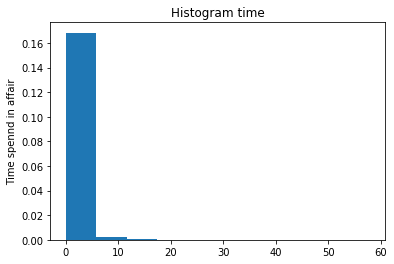

In [56]:
# plotting histogram in order to see time spend in affairs
plt.hist(df.affair_int, normed = True, histtype = 'bar')

#plt.legend()
plt.ylabel('Time spennd in affair')
plt.title('Histogram time')

plt.show()


In [57]:
# Definición de variables:
# Utilice las mismas variables independientes que en el caso del modelo Logit
Y = df['affair_int']
X = df[['yrs_married','children','occupation']]
X = sm.add_constant(X)

In [58]:
# Poisson:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit()
print(poisson_res.summary())

Optimization terminated successfully.
         Current function value: 1.734184
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:             affair_int   No. Observations:                 6366
Model:                        Poisson   Df Residuals:                     6362
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                0.008061
Time:                        02:17:13   Log-Likelihood:                -11040.
converged:                       True   LL-Null:                       -11130.
Covariance Type:            nonrobust   LLR p-value:                 1.169e-38
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0205      0.053     -0.383      0.701      -0.125       0.084
yrs_married    -0.0271    

In [ ]:
Aquí tanto los hijos como la ocupación siguen siendo reflejando un efecto negativo, pero con una significancia nula.
La variable que si cuenta con un cambio son los años de casados, en Poisson resulta que estos evitan, en un 2% 
que se den relaciones extramaritales comparado con el efecto positivo con el modelo Logit.

In [59]:
poisson_margeff = poisson_res.get_margeff()
print(poisson_margeff.summary())

       Poisson Marginal Effects      
Dep. Variable:             affair_int
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
yrs_married    -0.0230      0.003     -8.434      0.000      -0.028      -0.018
children        0.0044      0.013      0.330      0.741      -0.022       0.031
occupation      0.0187      0.012      1.522      0.128      -0.005       0.043


In [ ]:
La relación marginal de Possion nos confirma los argumentos anteriores.

## 5. Comparación de resultados

In [60]:
# Resultados:
results_table = summary_col(results=[affair_est, poisson_res],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model Logit',
                                         'Model Poisson'],
                            regressor_order=['const',
                                             'occupation', 
                                             'educ', 
                                             'occupation_husb', 
                                             'rate_marriage', 
                                             'age', 
                                             'yrs_married', 
                                             'children', 
                                             'religious'])

results_table.add_title('Table 1 - Comparative Logit and Poisson Regressions')

print(results_table)

Table 1 - Comparative Logit and Poisson Regressions
            Model Logit Model Poisson
-------------------------------------
const                   -0.02        
                        (0.05)       
occupation  0.05*       0.02         
            (0.03)      (0.01)       
yrs_married 0.06***     -0.03***     
            (0.01)      (0.00)       
children    0.02        0.01         
            (0.03)      (0.02)       
Intercept   -1.47***                 
            (0.11)                   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
Analizando las correlaciones, en nuestras 3 variables se mantiene, siendo los años de casados los que se encuentran 
en el rango de 95%, por lo que llego a mi conclusión que de las distintas variables de los cuales hay datos, esta es
la más influyente